<a href="https://colab.research.google.com/github/yusufsjustit/14-Python-Pandas/blob/main/PandasDataFrames_02_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Pandas
by Ryan Orsinger

## Introducing DataFrames

### Pandas DataFrames Basics - Part 2
- Helpful Jupyter features
- Importing a CSV dataset
- Selecting multiple columns
- Counting True values in a Boolean series
- Filtering rows with Boolean masks
- Using AND and OR operators
- Why and when to use .copy
- Sorting a dataframe by one or more columns

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# pd.read_csv reads a comma-separated value file and returns a dataframe
mpg = pd.read_csv("mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# Showing the object.tab autocomplete option
# Type the variable that's already been evaluated in memory
# This works with imported modules, too
# Type .
# Then type the <Tab> character
mpg.count?

In [ ]:
# Pulling up the docstring for a method
mpg.head?

In [ ]:
# .tail looks at the last records of a pandas object (series or datafram)
mpg.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [ ]:
# The square brackets on the dataframe can accept a list of column names
columns_of_interest = ["displ", "cty", "hwy"]
mpg[columns_of_interest].head()
#mpg[["displ", "cty", "hwy"]]

,displ,cty,hwy
0,7.0,15,24
1,6.5,14,17
2,6.2,15,25
3,6.2,16,26
4,6.1,11,14


In [ ]:
# You'll also see the same result with double square brackets
mpg[["cty", "hwy"]].head()

,cty,hwy
0,15,24
1,14,17
2,15,25
3,16,26
4,11,14


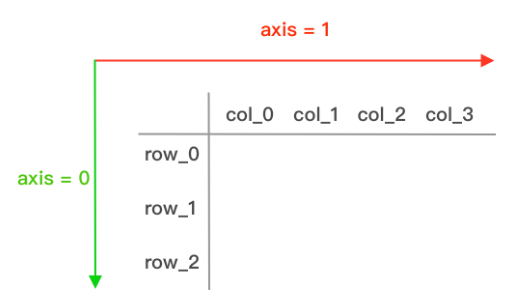

In [ ]:
# Our functions like .mean, .sum, .median, min/max evaluate an entire column, by default
# There's a default argument in .mean() that's axis=0 (which means column)
mpg[["cty", "hwy"]].mean(axis=0)

,0
cty,16.858974
hwy,23.440171


In [ ]:
mpg[["cty", "hwy"]].head()

,cty,hwy
0,15,24
1,14,17
2,15,25
3,16,26
4,11,14


In [ ]:
# axis=1 means execute the .mean on each row, row-wise execution
mpg[["cty", "hwy"]].mean(axis=1).head()

,0
0,19.5
1,15.5
2,20.0
3,21.0
4,12.5


In [ ]:
# axis=1 calculates the row-wise average
mpg["average_mileage"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35


In [ ]:
# value_counts shows unique values and their distribution
mpg.cyl.value_counts()

,count
cyl,
4,81
6,79
8,70
5,4


In [ ]:
mpg.shape

(234, 14)

In [ ]:
# Using Boolean Series to answer questions
# How many audis in the dataset
# True works as a 1, False works as 0
(mpg.manufacturer == "audi").sum()

18

In [ ]:
# What proportion of engines are 4 cylinders?
(mpg.cyl == 4).mean()

0.34615384615384615

In [ ]:
# Using Boolean Series to filter a dataframe
mpg[mpg.cyl == 5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
153,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5,True,24.05
162,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0,False,23.60
170,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0,False,24.60
171,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,True,24.60


In [ ]:
# You can mix and match the columns used to generate Booleans, the Boolean values don't care
mpg[(mpg.model == "maxima") | (mpg.cyl == 5)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
103,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize,22.0,True,21.70
127,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize,22.0,False,21.70
129,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize,22.0,True,21.60
153,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5,True,24.05
162,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0,False,23.60
170,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0,False,24.60
171,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0,True,24.60


In [ ]:
# AND limits options. Both predicates must be true
mpg[(mpg["class"] == "midsize") & (mpg["displ"] < 2)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
218,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,23.5,True,22.95
219,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,25.0,False,24.60


In [ ]:
original_df = pd.DataFrame({"x": [1, 2, 3]})
original_df

,x
0,1
1,2
2,3


In [ ]:
# Be careful assigning Python collections like this...
# This works the same way with lists, dictionaries, and many other collection objects
new_df = original_df
new_df

,x
0,1
1,2
2,3


In [ ]:
original_df["y"] = original_df.x * 100
original_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
# Use .copy to make a proper copy of a dataframe
new_df = original_df.copy()
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
original_df["z"] = 5000
original_df

,x,y,z
0,1,100,5000
1,2,200,5000
2,3,300,5000


In [ ]:
# The new df was created from a copy and avoids future mutation to the original dataframe
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
# Sorting by a single column
mpg.sort_values(by=["average_mileage"], ascending=False, ignore_index=True).head()
#top 5 highest average milage vehicles

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,False,39.05
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,False,37.95
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,True,34.40
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,False,32.05
4,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.5,True,30.05


In [ ]:
# Sorting by multiple columns
mpg.sort_values(by=["hwy", "cty"], ascending=False, ignore_index=True).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,False,39.05
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,False,37.95
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,True,34.40
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,False,32.05
4,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,30.5,True,29.95


In [ ]:
# Updating the dataframe to store the sorted values
# Use inplace=True or reassign the dataframe variable (not both)
mpg.sort_values(by="displ", ascending=False, ignore_index=True, inplace=True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35


## Additional Resources
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas Comparison to Spreadsheets](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_spreadsheets.html)
- [Pandas Comparison to SQL](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_sql.html)

## Exercises
- Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not.
- Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
- Write the pandas code to determine what percentage of the vehicles are subcompacts?
- Combined fuel economy is a weighted average of the city value by 55% and the highway value by 45%. Use arithmetic operators to add a new column named `fuel_economy` to the `mpg` dataframe.
- Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.



In [ ]:
# Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not.
mpg["is_automatic"] = mpg["trans"].str.contains("auto")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35


In [ ]:
# Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
mpg["is_automatic"].sum()

157

In [ ]:
# Write the pandas code to determine what percentage of the vehicles are subcompacts?
mpg.loc[mpg["class"] == "subcompact", "class"].count() / mpg["class"].count() * 100

14.957264957264957

In [ ]:
mpg.loc[mpg["class"] == "subcompact", "class"].count()

35

In [ ]:
mpg["class"].count()

234

In [ ]:
# Create a `fuel_economy` column. Fuel economy is a weighted average of the city value by 55% and the highway value by 45%
mpg["fuel_economy"] = mpg["cty"] * 0.55 + mpg["hwy"] * 0.45
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35


In [ ]:
# Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.
mpg[mpg["fuel_economy"] > mpg["fuel_economy"].median()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
13,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
85,ford,mustang,4.0,2008,6,manual(m5),r,17,26,r,subcompact,21.5,False,21.05
90,ford,mustang,3.8,1999,6,manual(m5),r,18,26,r,subcompact,22.0,False,21.60
91,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact,21.5,True,21.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,28.5,False,28.15
230,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0,True,27.60
231,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5,False,30.25
232,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0,True,27.60


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

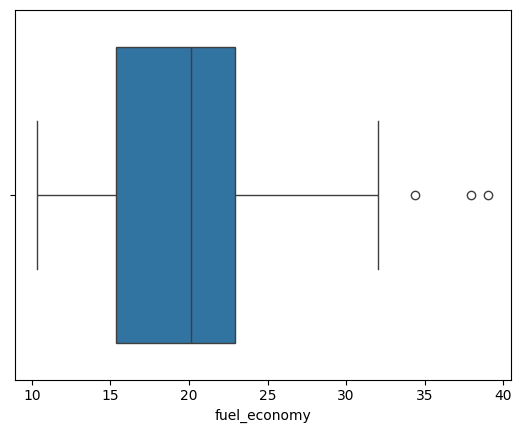

In [ ]:
sns.boxplot(x=mpg["fuel_economy"])
plt.show()

In [ ]:
q1 = mpg.fuel_economy.quantile(0.25)
q1

15.350000000000001

In [ ]:
q3 = mpg.fuel_economy.quantile(0.75)
q3

22.950000000000003

In [ ]:
iqr = q3 - q1
iqr

7.600000000000001

In [ ]:
upper = q3 + 1.5 *iqr
upper

34.35000000000001

In [ ]:
mpg[mpg["fuel_economy"]>upper]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
212,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,True,34.40
213,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,False,39.05
214,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,False,37.95


In [ ]:
lower = q1 - 1.5 *iqr
lower

3.9499999999999993

In [ ]:
mpg_filtered =mpg[(mpg["fuel_economy"] < upper) & (mpg["fuel_economy"]>lower)]
mpg_filtered

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,28.5,False,28.15
230,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0,True,27.60
231,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5,False,30.25
232,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0,True,27.60
